<a href="https://colab.research.google.com/github/radhika1603/INCLASSACTIVITIES/blob/main/mrmassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64
Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64

Single Listin

<ipython-input-4-39dc68207310>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')


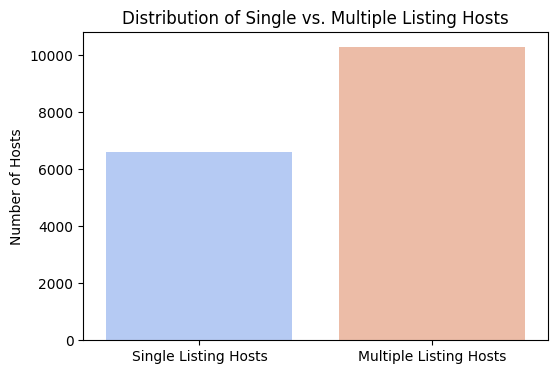


Average Price Difference (English - Spanish): 0.57

Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-4-39dc68207310>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


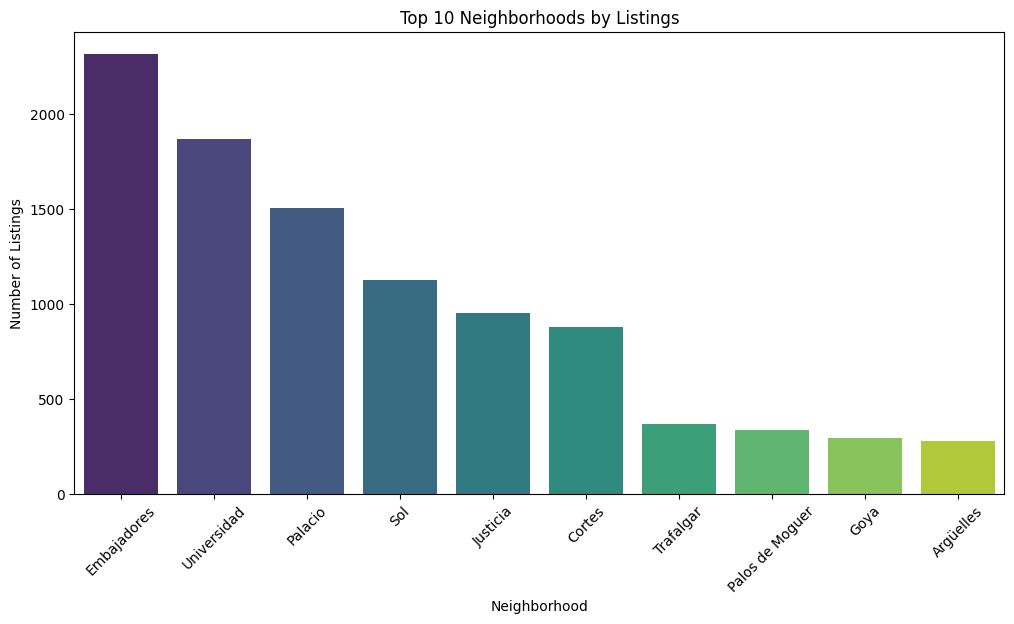

<ipython-input-4-39dc68207310>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


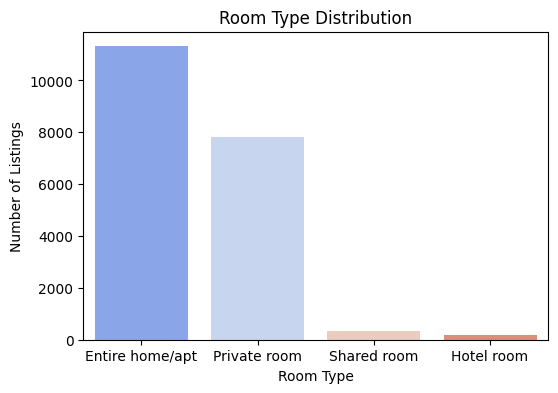

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# 1) Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# 2) Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
total_hosts = single_listing_hosts + multi_listing_hosts

single_percentage = (single_listing_hosts / total_hosts) * 100
multi_percentage = (multi_listing_hosts / total_hosts) * 100

print("\nSingle Listing Hosts:", single_listing_hosts, f"({single_percentage:.2f}%)")
print("Multiple Listing Hosts:", multi_listing_hosts, f"({multi_percentage:.2f}%)")

# Visualization of host distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')
plt.ylabel("Number of Hosts")
plt.title("Distribution of Single vs. Multiple Listing Hosts")
plt.show()

# 4) Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# 5) Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()

Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64

Single Listing Hosts: 6606
Multiple Listing Hosts: 10282

Average Price Difference (English - Spanish): 0.57

Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-2-2514fa370e84>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


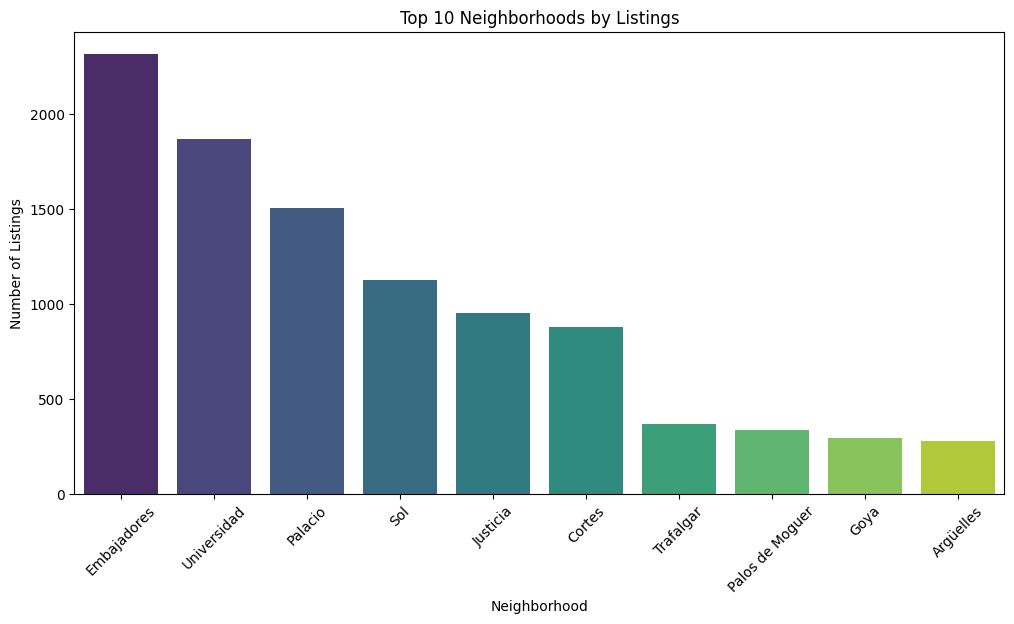

<ipython-input-2-2514fa370e84>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


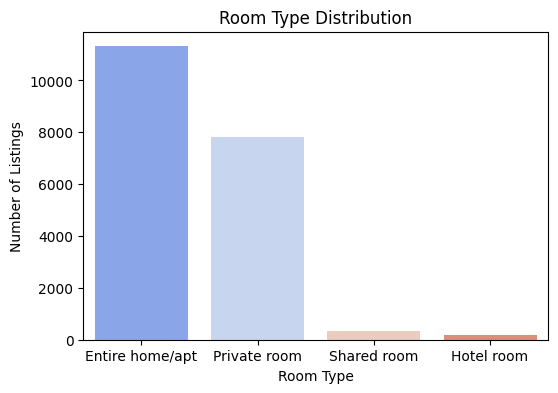

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
print("\nSingle Listing Hosts:", single_listing_hosts)
print("Multiple Listing Hosts:", multi_listing_hosts)

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()


Room Type Distribution:
room_type
Entire home/apt    57.671526
Private room       39.805281
Shared room         1.677031
Hotel room          0.846162
Name: proportion, dtype: float64
Chi-Square Statistic: 18943.091650525028
p-value: 0.0


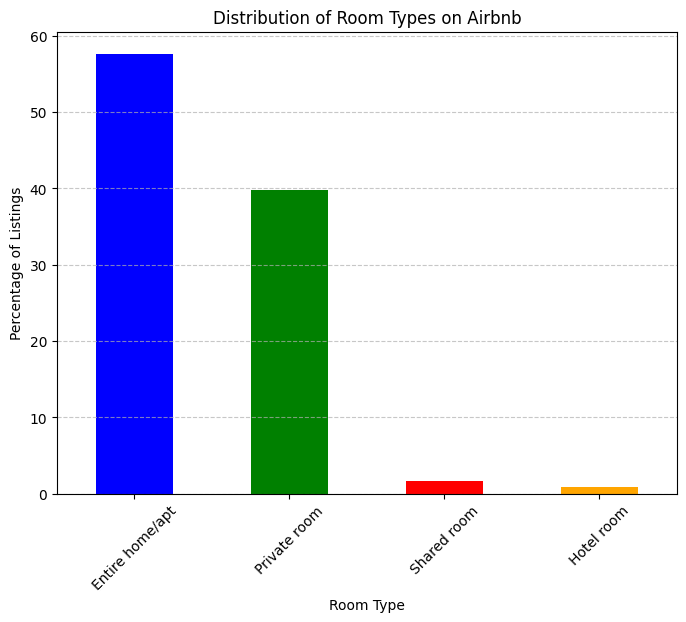

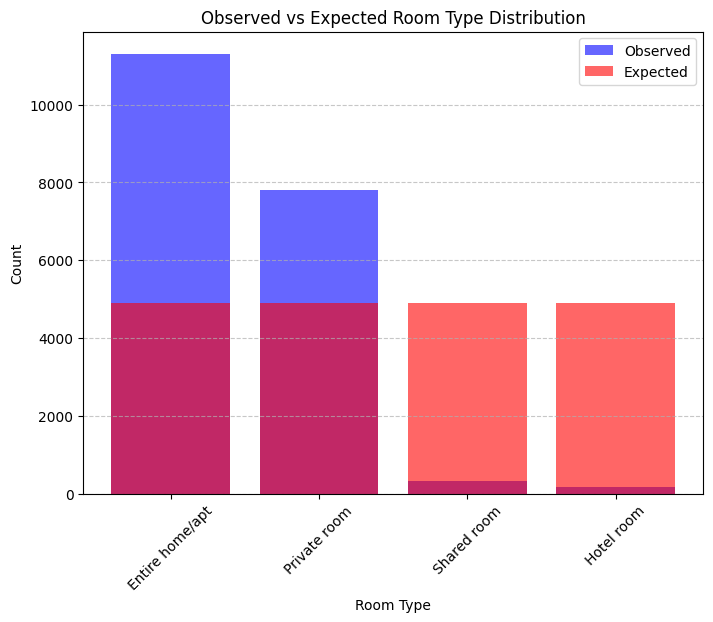

Top 10 Neighborhoods with most listings:
neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64


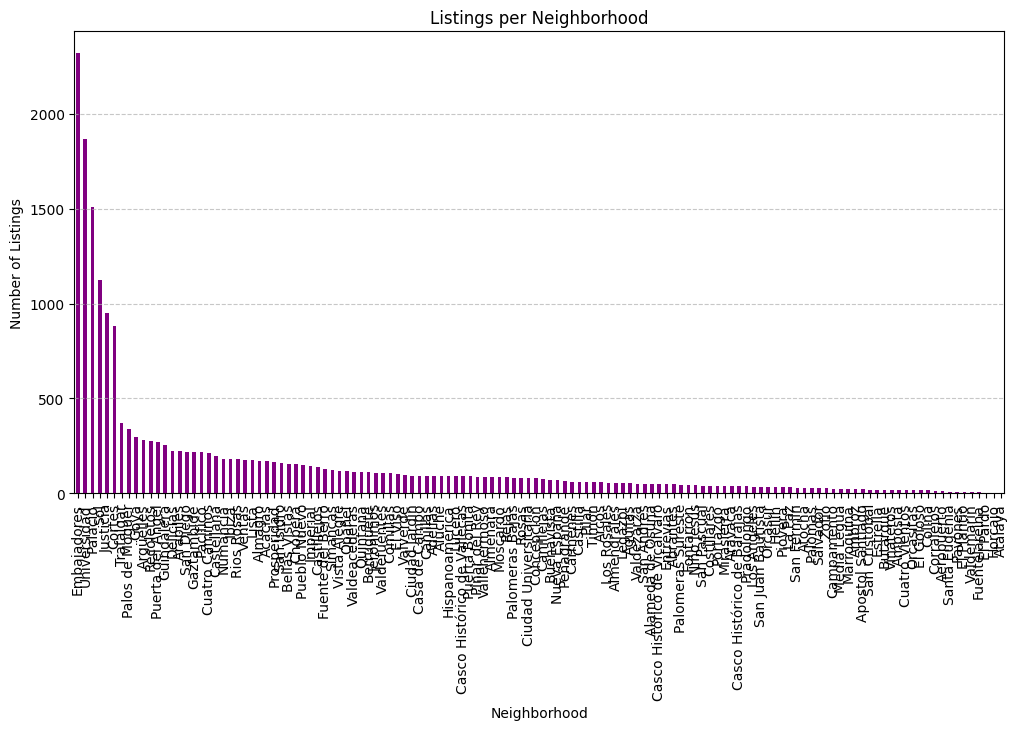

Gini Coefficient for Neighborhood Listing Distribution: 0.6414397810684065
Chi-Square Statistic for Neighborhood Distribution: 83489.6472627179
p-value: 0.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Load the dataset
file_path = "/content/listings_detailed.csv"  # Updated path
df = pd.read_csv(file_path)

# Analyze the distribution of room types
room_type_distribution = df['room_type'].value_counts(normalize=True) * 100

# Print the distribution
print("Room Type Distribution:")
print(room_type_distribution)

# Perform Chi-Square test
expected_counts = [len(df) / len(room_type_distribution)] * len(room_type_distribution)
observed_counts = df['room_type'].value_counts().values
chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Print Chi-Square results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

# Plot the distribution of room types
plt.figure(figsize=(8, 6))
room_type_distribution.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title("Distribution of Room Types on Airbnb")
plt.xlabel("Room Type")
plt.ylabel("Percentage of Listings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot observed vs expected counts
plt.figure(figsize=(8, 6))
plt.bar(df['room_type'].value_counts().index, observed_counts, color='blue', alpha=0.6, label='Observed')
plt.bar(df['room_type'].value_counts().index, expected_counts, color='red', alpha=0.6, label='Expected')
plt.title("Observed vs Expected Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Question 2: Are listings evenly distributed across all neighborhoods?

# Count listings per neighborhood
neighborhood_distribution = df['neighbourhood_cleansed'].value_counts()

# Print top 10 neighborhoods
print("Top 10 Neighborhoods with most listings:")
print(neighborhood_distribution.head(10))

# Plot distribution of listings across neighborhoods
plt.figure(figsize=(12, 6))
neighborhood_distribution.plot(kind='bar', color='purple')
plt.title("Listings per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Gini Coefficient Calculation (Measures Inequality in Distribution)
def gini_coefficient(values):
    sorted_values = np.sort(values)
    n = len(values)
    cumulative = np.cumsum(sorted_values) / np.sum(sorted_values)
    gini_index = 1 - 2 * np.sum(cumulative) / n + 1 / n
    return gini_index

gini_index = gini_coefficient(neighborhood_distribution.values)
print("Gini Coefficient for Neighborhood Listing Distribution:", gini_index)

# Chi-Square test for uniform distribution assumption
expected_neigh_counts = [len(df) / len(neighborhood_distribution)] * len(neighborhood_distribution)
chi2_neigh_stat, p_neigh_value = stats.chisquare(f_obs=neighborhood_distribution.values, f_exp=expected_neigh_counts)

# Print Chi-Square results
print("Chi-Square Statistic for Neighborhood Distribution:", chi2_neigh_stat)
print("p-value:", p_neigh_value)

Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64


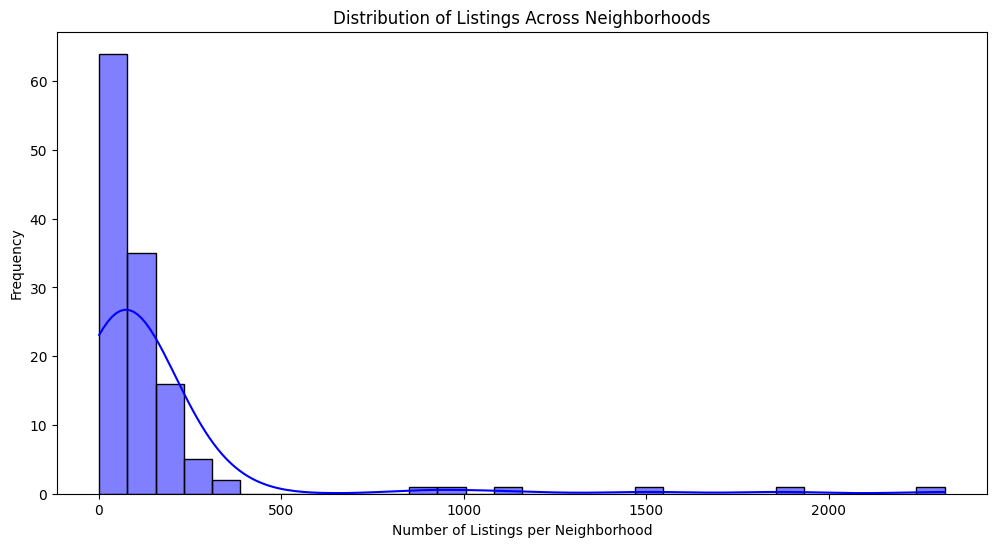

<ipython-input-6-f4374bda6ea4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')


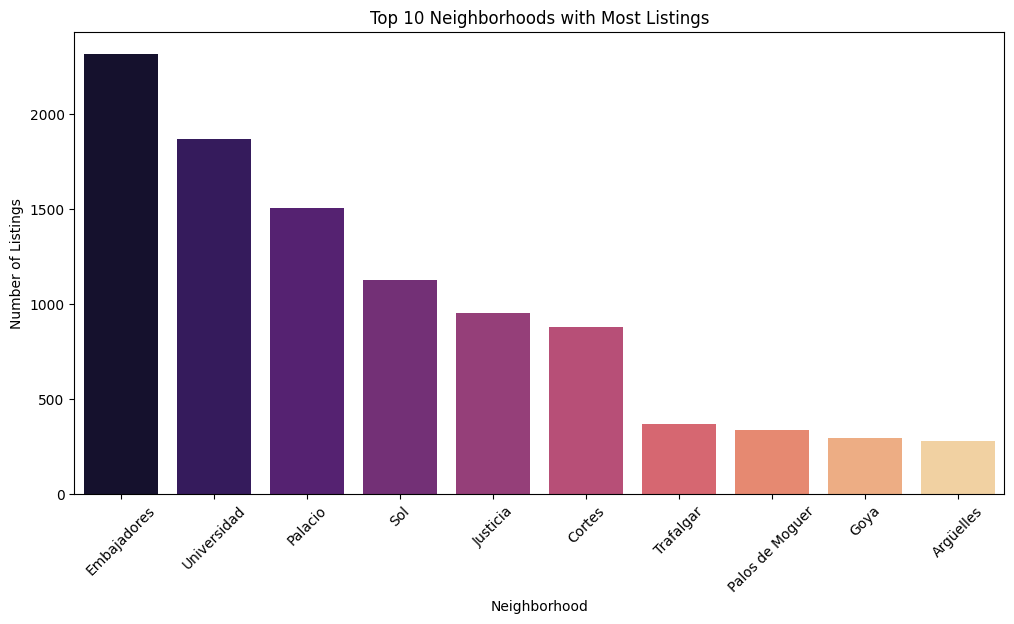


Single Listing Hosts: 6606 (39.12%)
Multiple Listing Hosts: 10282 (60.88%)


<ipython-input-6-f4374bda6ea4>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')


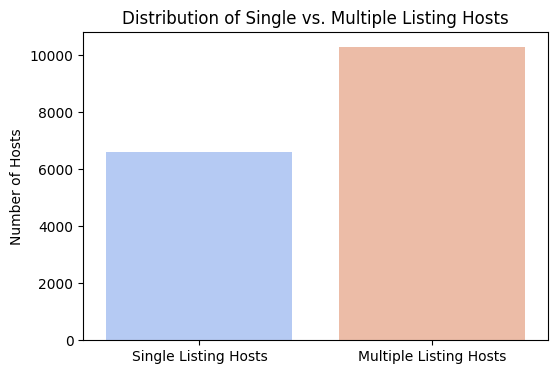


Average Price Difference (English - Spanish): 0.57

Price Difference by District:
 neighbourhood_cleansed
San Andrés                      582.473193
Lucero                          443.277778
Orcasur                         325.666667
Niño Jesús                      148.232558
Fuente del Berro                144.780603
El Goloso                       143.214286
Cortes                          128.034652
Peñagrande                      122.967213
Casco Histórico de Vicálvaro    121.705426
Palos de Moguer                 119.044393
dtype: float64


<ipython-input-6-f4374bda6ea4>:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  district_price_diff = df.groupby('neighbourhood_cleansed').apply(lambda x: x[x['is_english'] == True]['price'].mean() - x[x['is_english'] == False]['price'].mean()).dropna()


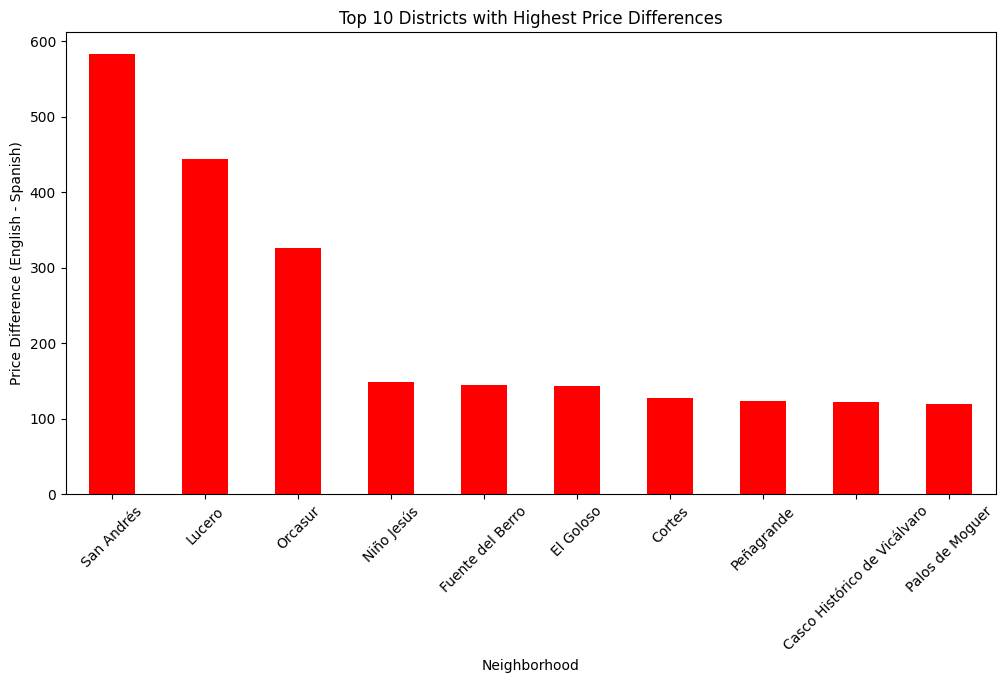


Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-6-f4374bda6ea4>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


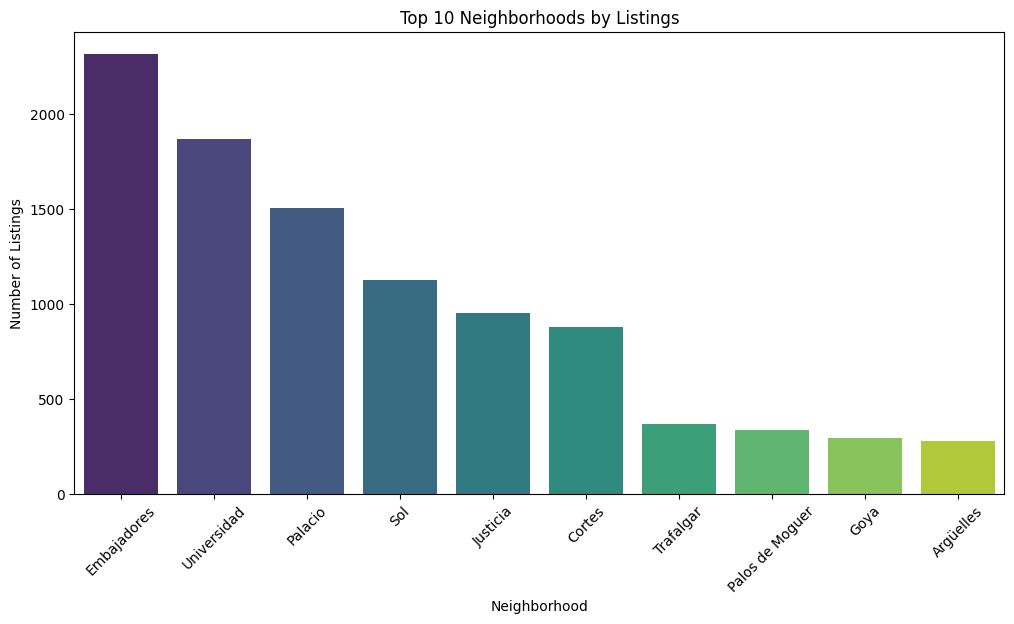

<ipython-input-6-f4374bda6ea4>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


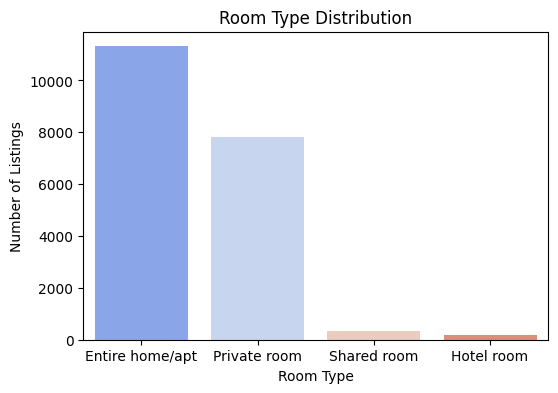

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Visualization of neighborhood distribution
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True, color='blue')
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()

# Identifying hot areas (top 10 neighborhoods with most listings)
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods with Most Listings")
plt.show()

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
total_hosts = single_listing_hosts + multi_listing_hosts

single_percentage = (single_listing_hosts / total_hosts) * 100
multi_percentage = (multi_listing_hosts / total_hosts) * 100

print("\nSingle Listing Hosts:", single_listing_hosts, f"({single_percentage:.2f}%)")
print("Multiple Listing Hosts:", multi_listing_hosts, f"({multi_percentage:.2f}%)")

# Visualization of host distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')
plt.ylabel("Number of Hosts")
plt.title("Distribution of Single vs. Multiple Listing Hosts")
plt.show()

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Price difference by neighborhood
district_price_diff = df.groupby('neighbourhood_cleansed').apply(lambda x: x[x['is_english'] == True]['price'].mean() - x[x['is_english'] == False]['price'].mean()).dropna()
print("\nPrice Difference by District:\n", district_price_diff.sort_values(ascending=False).head(10))

# Visualizing price differences per district
plt.figure(figsize=(12, 6))
district_price_diff.sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.xlabel("Neighborhood")
plt.ylabel("Price Difference (English - Spanish)")
plt.title("Top 10 Districts with Highest Price Differences")
plt.xticks(rotation=45)
plt.show()

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()


Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64


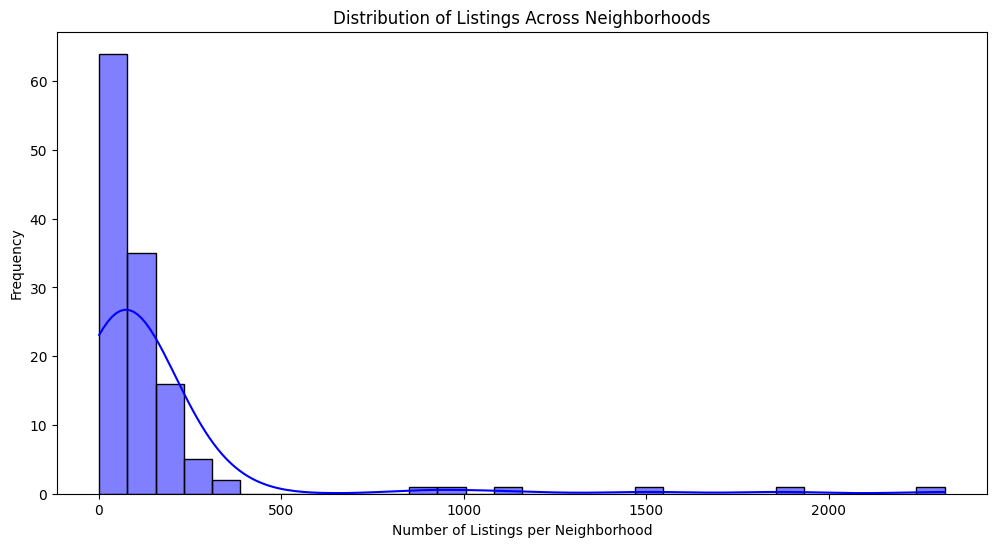

<ipython-input-10-782369359470>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')


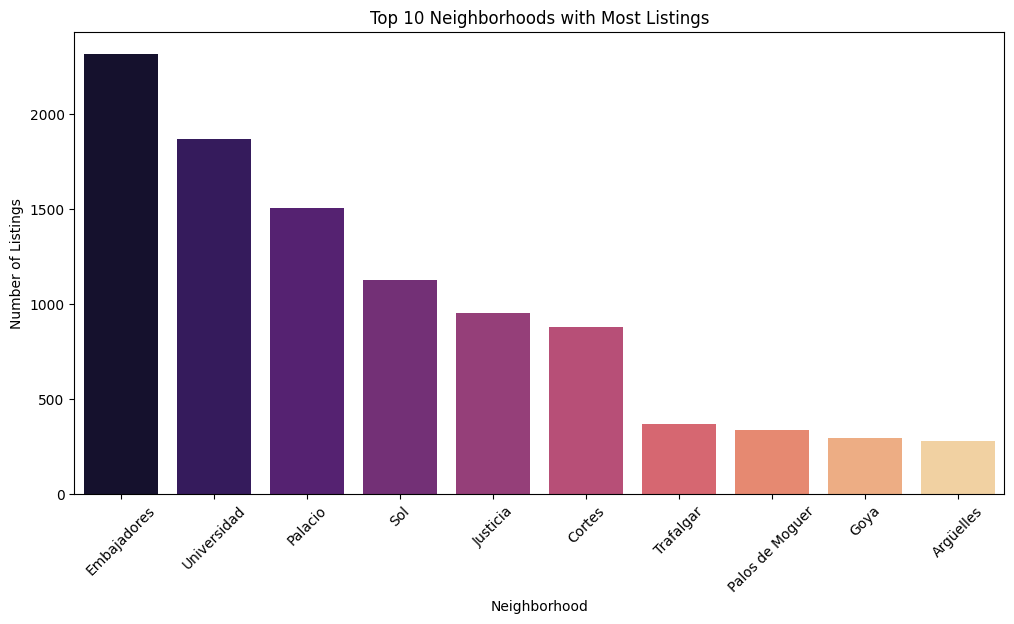


Single Listing Hosts: 6606 (39.12%)
Multiple Listing Hosts: 10282 (60.88%)


<ipython-input-10-782369359470>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')


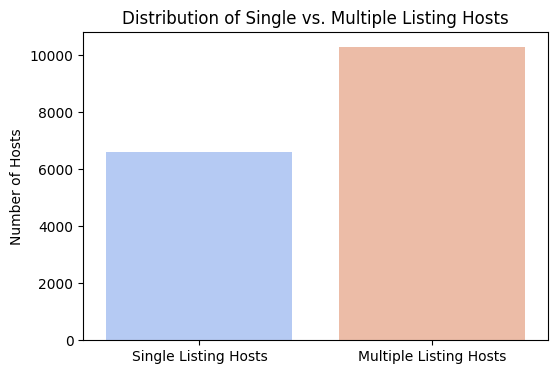


Average Price Difference (English - Spanish): 0.57

Price Difference by District:
 neighbourhood_cleansed
San Andrés                      582.473193
Lucero                          443.277778
Orcasur                         325.666667
Niño Jesús                      148.232558
Fuente del Berro                144.780603
El Goloso                       143.214286
Cortes                          128.034652
Peñagrande                      122.967213
Casco Histórico de Vicálvaro    121.705426
Palos de Moguer                 119.044393
dtype: float64


<ipython-input-10-782369359470>:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  district_price_diff = df.groupby('neighbourhood_cleansed').apply(lambda x: x[x['is_english'] == True]['price'].mean() - x[x['is_english'] == False]['price'].mean()).dropna()


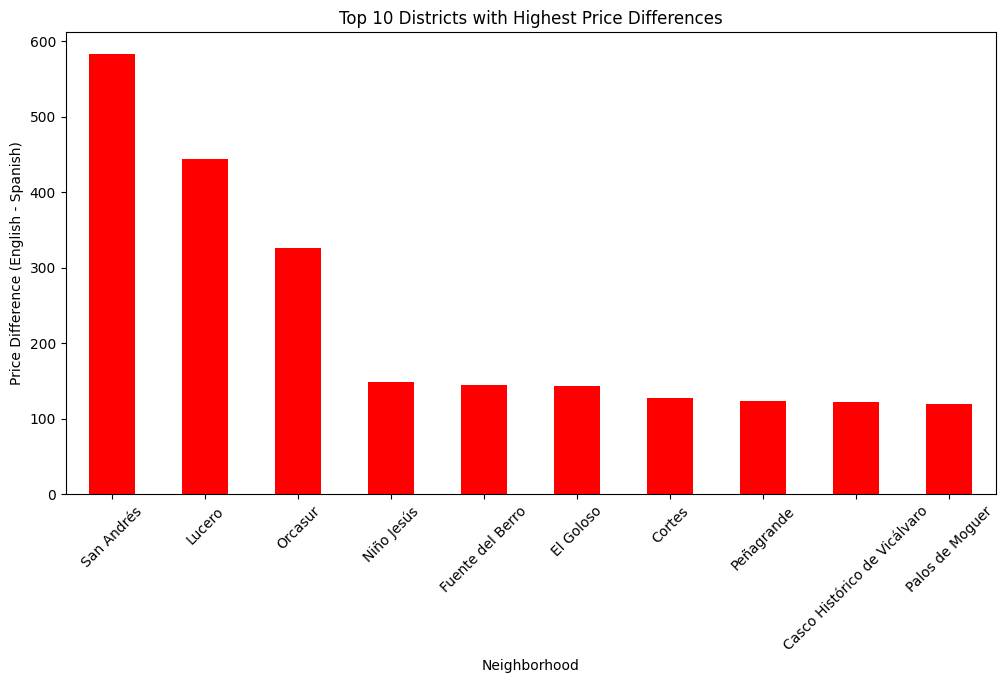


Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-10-782369359470>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


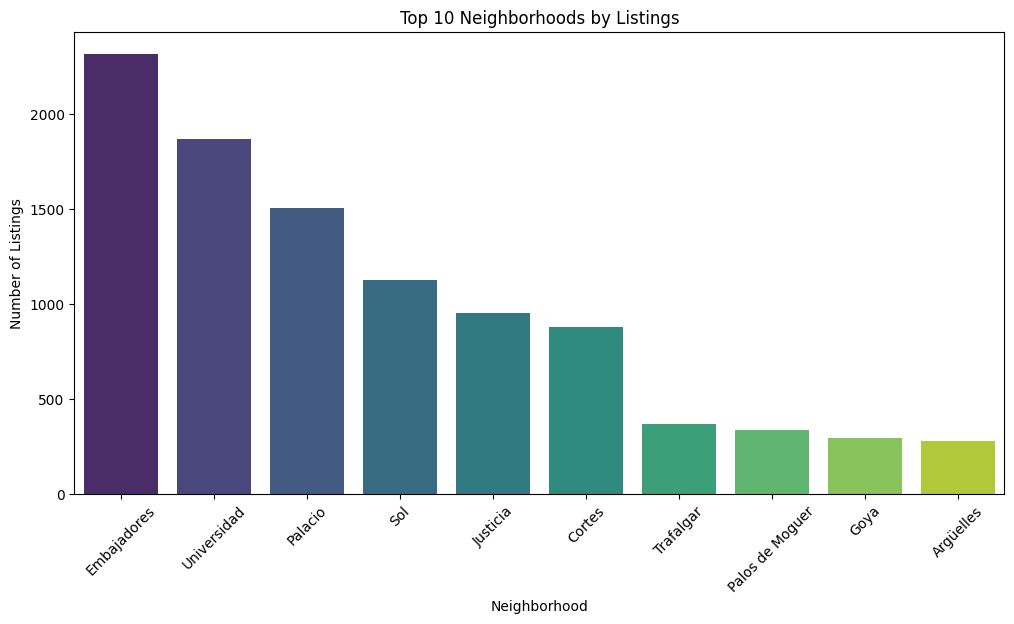

<ipython-input-10-782369359470>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


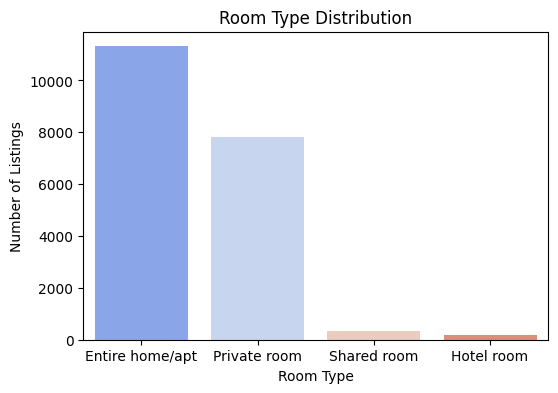

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Visualization of neighborhood distribution
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True, color='blue')
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()

# Identifying hot areas (top 10 neighborhoods with most listings)
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods with Most Listings")
plt.show()

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
total_hosts = single_listing_hosts + multi_listing_hosts

single_percentage = (single_listing_hosts / total_hosts) * 100
multi_percentage = (multi_listing_hosts / total_hosts) * 100

print("\nSingle Listing Hosts:", single_listing_hosts, f"({single_percentage:.2f}%)")
print("Multiple Listing Hosts:", multi_listing_hosts, f"({multi_percentage:.2f}%)")

# Visualization of host distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')
plt.ylabel("Number of Hosts")
plt.title("Distribution of Single vs. Multiple Listing Hosts")
plt.show()

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Price difference by neighborhood
district_price_diff = df.groupby('neighbourhood_cleansed').apply(lambda x: x[x['is_english'] == True]['price'].mean() - x[x['is_english'] == False]['price'].mean()).dropna()
print("\nPrice Difference by District:\n", district_price_diff.sort_values(ascending=False).head(10))

# Visualizing price differences per district
plt.figure(figsize=(12, 6))
district_price_diff.sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.xlabel("Neighborhood")
plt.ylabel("Price Difference (English - Spanish)")
plt.title("Top 10 Districts with Highest Price Differences")
plt.xticks(rotation=45)
plt.show()

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

# Convert verified host identity to binary (0: Not Verified, 1: Verified)
df_filtered['host_identity_verified'] = df_filtered['host_identity_verified'].map({'t': 1, 'f': 0})
features.append('host_identity_verified')

X = df_filtered[features]
y = df_filtered['price']


print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# 5. Price factors analysis
def analyze_price_factors():
    # Clean price column
    df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

    # Prepare features
    features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']

    # Calculate correlations
    correlations = {}
    for feature in features:
        correlation = df[['price_clean', feature]].dropna().corr().iloc[0,1]
        correlations[feature] = correlation

    print("\nCorrelations with Price:")
    for feature, corr in correlations.items():
        print(f"{feature}: {corr:.4f}")

    # Create correlation plot
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values())
    plt.title('Correlation of Features with Price')
    plt.xticks(rotation=45)
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()


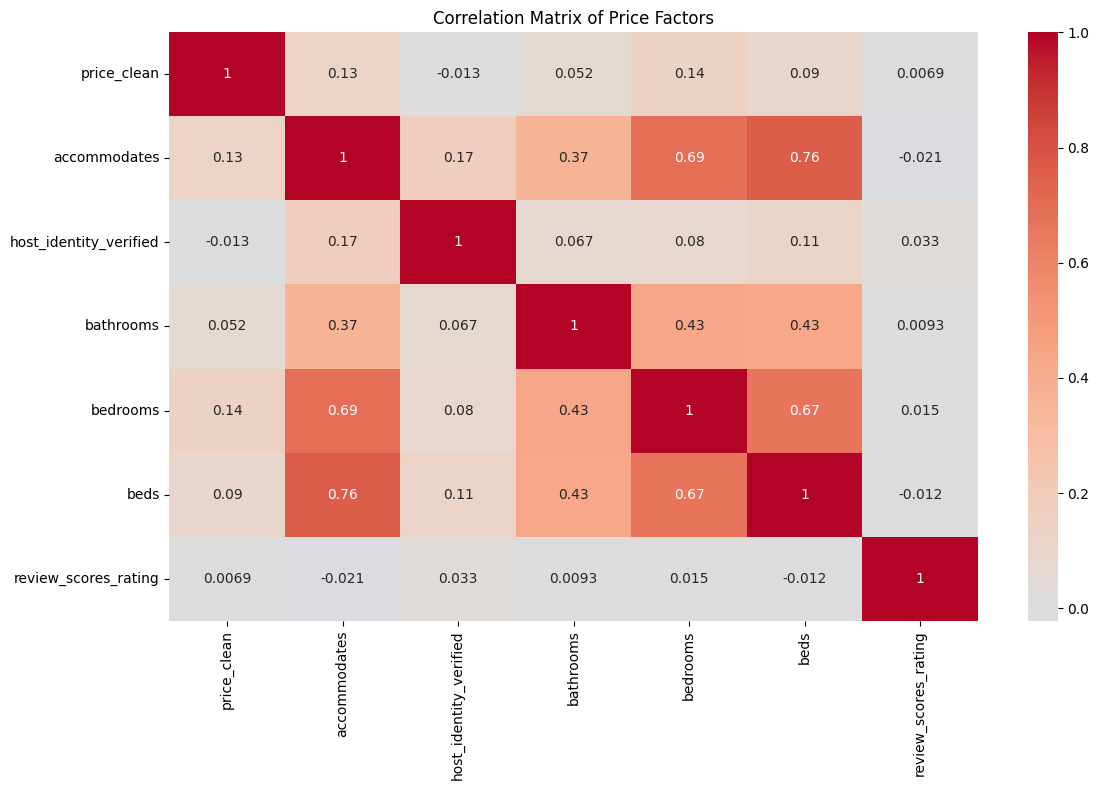

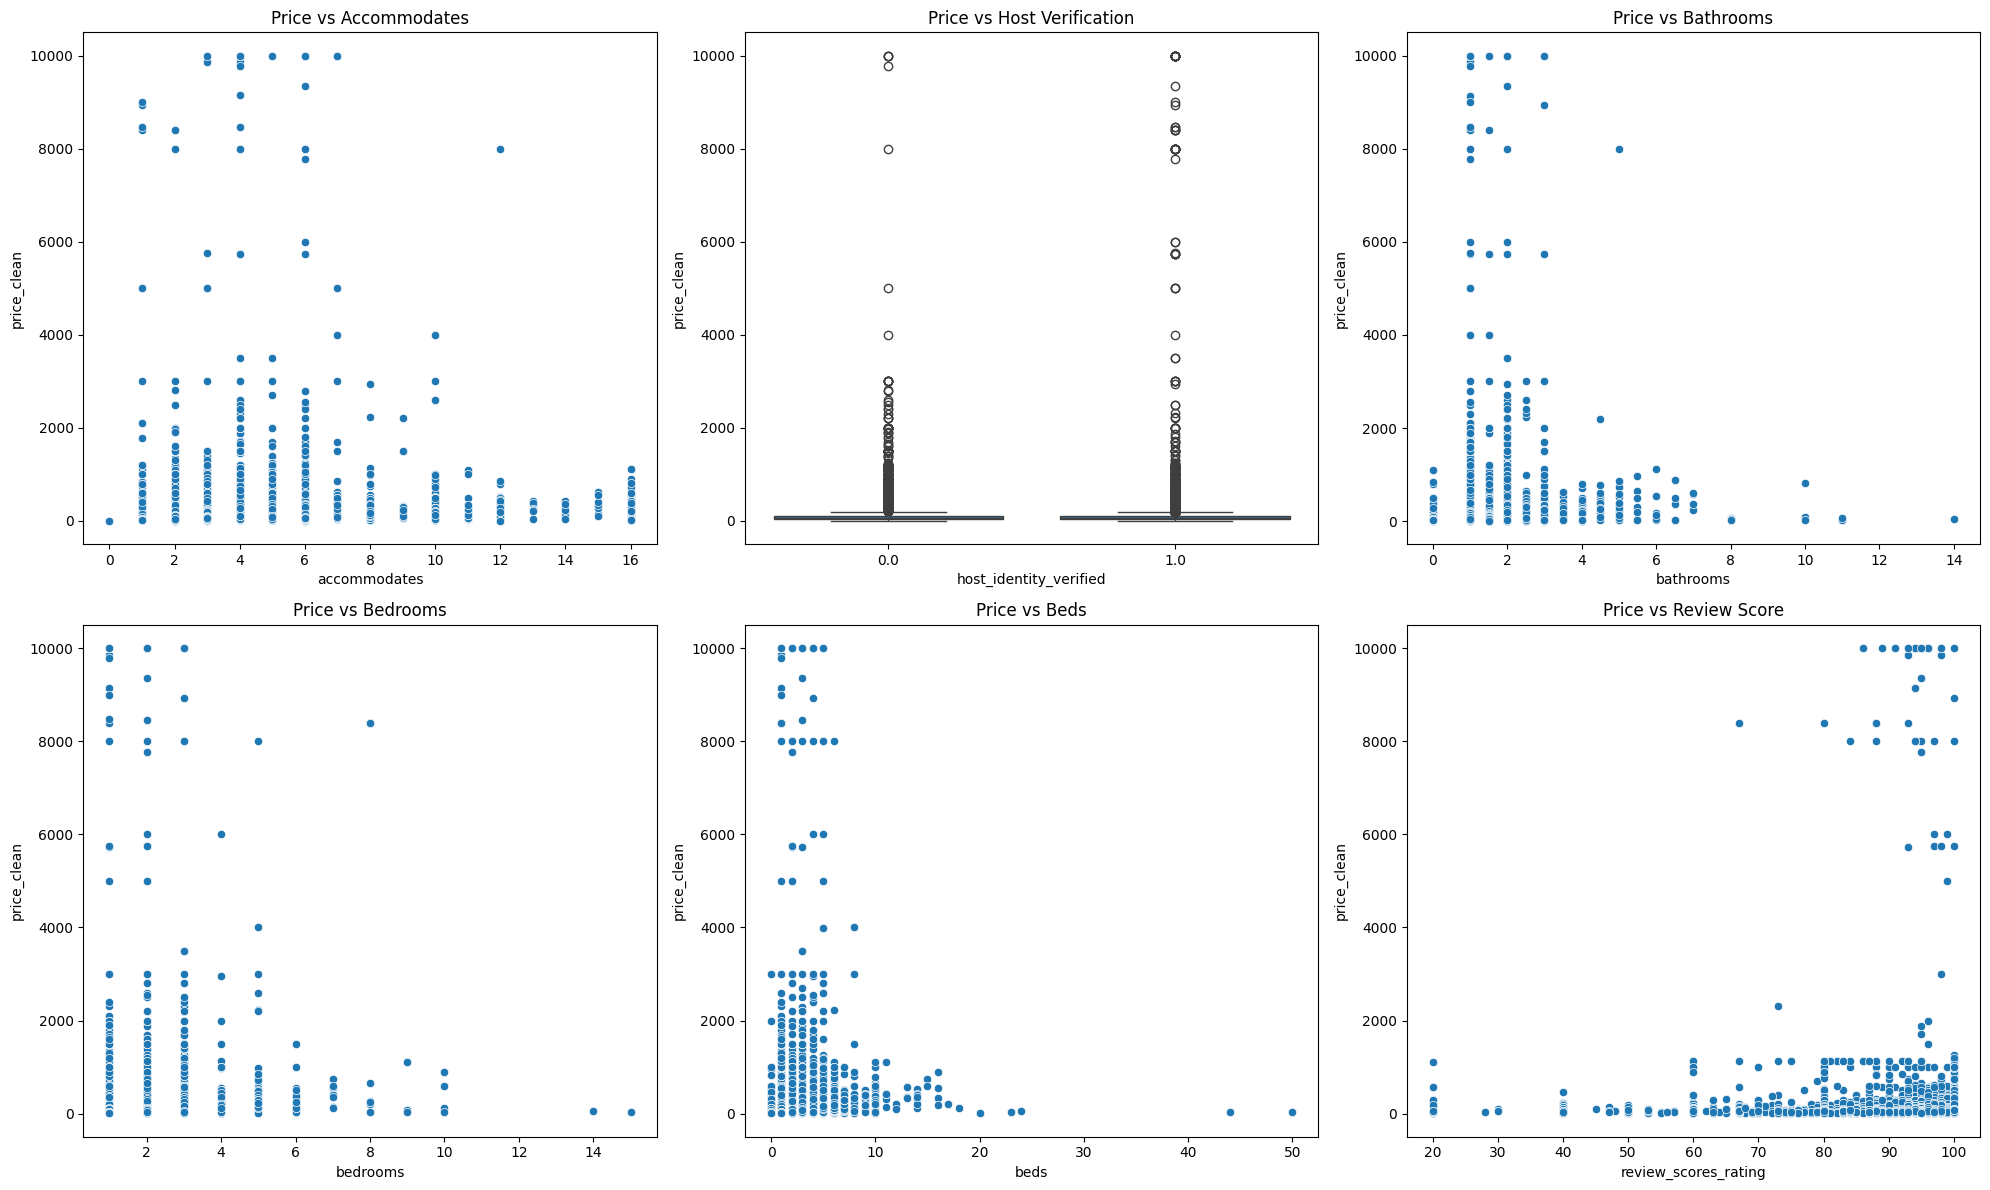


Statistical Analysis of Price Factors:
--------------------------------------------------

Correlations with Price:
price_clean               1.000000
bedrooms                  0.143674
accommodates              0.128984
beds                      0.090044
bathrooms                 0.052288
review_scores_rating      0.006931
host_identity_verified   -0.012847
Name: price_clean, dtype: float64

Verified vs Unverified Host T-Test:
t-statistic: -1.7752
p-value: 0.0759

Standardized Regression Coefficients:
                  Feature  Standardized Coefficient
3                bedrooms                 65.889824
0            accommodates                 38.323905
1  host_identity_verified                  5.443900
5    review_scores_rating                  4.922492
2               bathrooms                 -3.712387
4                    beds                -27.676893

R-squared: 0.0248

Average Prices by Factor Levels:

Verified vs Unverified Hosts:
host_identity_verified
0.0    136.978032
1.

<ipython-input-11-57bb85d46109>:119: RuntimeWarning: divide by zero encountered in divide
  x_pct_change = np.diff(x) / x[:-1]
<ipython-input-11-57bb85d46109>:120: RuntimeWarning: divide by zero encountered in divide
  y_pct_change = np.diff(y) / y[:-1]
<ipython-input-11-57bb85d46109>:121: RuntimeWarning: invalid value encountered in divide
  return np.mean(y_pct_change / x_pct_change)


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Read and prepare the data
df = pd.read_csv('/content/listings_detailed.csv')

# Clean price column
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Select features for analysis
features = ['accommodates', 'host_identity_verified', 'bathrooms_text',
           'bedrooms', 'beds', 'review_scores_rating']

# Clean and prepare data
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Create correlation analysis
analysis_df = df[['price_clean', 'accommodates', 'host_identity_verified',
                  'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']].copy()

# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = analysis_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Price Factors')
plt.tight_layout()
plt.show()

# 2. Individual Factor Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Accommodates vs Price
sns.scatterplot(data=df, x='accommodates', y='price_clean', ax=axes[0])
axes[0].set_title('Price vs Accommodates')

# Verified Host vs Price
sns.boxplot(data=df, x='host_identity_verified', y='price_clean', ax=axes[1])
axes[1].set_title('Price vs Host Verification')

# Bathrooms vs Price
sns.scatterplot(data=df, x='bathrooms', y='price_clean', ax=axes[2])
axes[2].set_title('Price vs Bathrooms')

# Bedrooms vs Price
sns.scatterplot(data=df, x='bedrooms', y='price_clean', ax=axes[3])
axes[3].set_title('Price vs Bedrooms')

# Beds vs Price
sns.scatterplot(data=df, x='beds', y='price_clean', ax=axes[4])
axes[4].set_title('Price vs Beds')

# Review Score vs Price
sns.scatterplot(data=df, x='review_scores_rating', y='price_clean', ax=axes[5])
axes[5].set_title('Price vs Review Score')

plt.tight_layout()
plt.show()

# 3. Statistical Analysis
print("\nStatistical Analysis of Price Factors:")
print("-" * 50)

# Correlation Analysis
correlations = analysis_df.corr()['price_clean'].sort_values(ascending=False)
print("\nCorrelations with Price:")
print(correlations)

# Impact of Verified Host (T-Test)
verified_prices = df[df['host_identity_verified'] == 1]['price_clean']
unverified_prices = df[df['host_identity_verified'] == 0]['price_clean']
t_stat, p_value = stats.ttest_ind(verified_prices, unverified_prices)
print("\nVerified vs Unverified Host T-Test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Multiple Linear Regression
X = analysis_df.dropna()[['accommodates', 'host_identity_verified', 'bathrooms',
                         'bedrooms', 'beds', 'review_scores_rating']]
y = analysis_df.dropna()['price_clean']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit regression
model = LinearRegression()
model.fit(X_scaled, y)

# Print regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Standardized Coefficient': model.coef_
})
print("\nStandardized Regression Coefficients:")
print(coefficients.sort_values('Standardized Coefficient', ascending=False))

# R-squared value
r_squared = model.score(X_scaled, y)
print(f"\nR-squared: {r_squared:.4f}")

# Calculate average prices
print("\nAverage Prices by Factor Levels:")
print("\nVerified vs Unverified Hosts:")
print(df.groupby('host_identity_verified')['price_clean'].mean())

print("\nAverage Price by Number of Accommodates:")
print(df.groupby('accommodates')['price_clean'].mean().head())

# Price elasticity
def calculate_elasticity(x, y):
    x_pct_change = np.diff(x) / x[:-1]
    y_pct_change = np.diff(y) / y[:-1]
    return np.mean(y_pct_change / x_pct_change)

# Calculate average prices for each accommodates value
avg_prices_by_accommodates = df.groupby('accommodates')['price_clean'].mean()
elasticity = calculate_elasticity(avg_prices_by_accommodates.index.values,
                                avg_prices_by_accommodates.values)

print(f"\nPrice Elasticity with respect to Accommodates: {elasticity:.4f}")